<a href="https://www.kaggle.com/code/typicalmango/testing-text-extraction-ocr?scriptVersionId=182137864" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw, ImageFont

In [3]:
img_fns = glob('/kaggle/input/nutritional-facts-from-food-label/Nutritional_Facts/*')

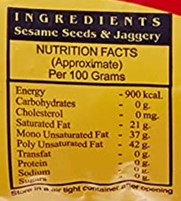

In [4]:
Image.open(img_fns[0])

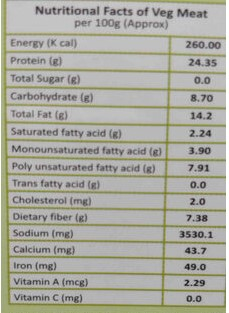

In [5]:
img_path = img_fns[20]
img = Image.open(img_path)
img

# TEST 1: PyTesseract

PyTesseract output:
 

 

Nutritional Facts of Veg

Meat

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

Ber 100¢ (Approx)
tomy Kad __——~—=«d;~a
[Protein te) 24.35
Tota Sear (@) 20
‘Carbohyate (a) 370
a2
Saturated fatty 30) 22a
Monounsaturated fatty naa (@)| 3.90
Poly unsaturated faty acid ig) | 7.9%
“ans fatty 90 (a 20
Cholesterol (me) 20
Dietary fiber (a 738
Sodium (ma) 3590.4
Callum (me) 337
iron (me) 39.0
vitamin Anes) 229
_Vitarnin C (emg) oo |

 

 

 



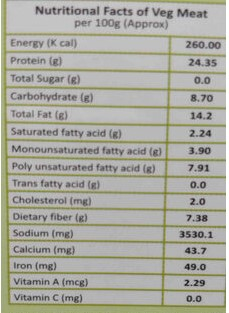

In [6]:
import pytesseract

print("PyTesseract output:")
print(pytesseract.image_to_string(img_fns[20], lang='eng'))
img

# TEST 2: EasyOCR

In [7]:
import easyocr

reader = easyocr.Reader(['en'], gpu = False)

In [8]:
results = reader.readtext(img_fns[20])

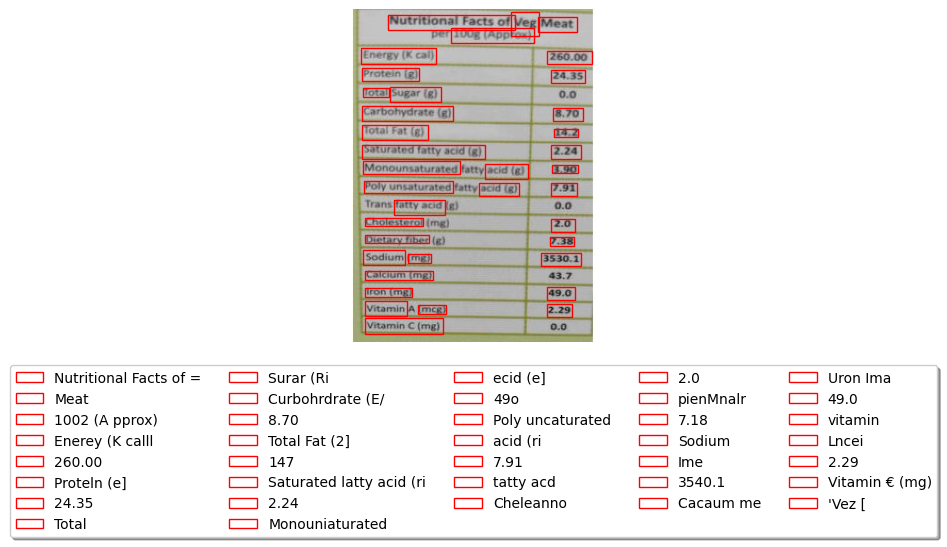

In [9]:
fig, ax = plt.subplots()

ax.imshow(img)
for bbox, text, conf in results:
    a, b, c, d = bbox
    rect = patches.Rectangle((a[0], a[1]), c[0]-a[0], c[1]-a[1], linewidth=1, edgecolor='r', facecolor='none', label=text)
    ax.add_patch(rect)
pos = ax.get_position()
ax.axis('off')
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()

# TEST 3: Keras-OCR (non-functional)

In [10]:
# !pip install keras-ocr -q
# !pip install wurlitzer==3.0.3 -q
# !pip install tensorflow==2.15 -q

In [11]:
# pipeline = keras_ocr.pipeline.Pipeline()

In [12]:
# results = pipeline.recognize([img_fns[20]])
# print("Keras OCR output:")
# print(pd.DataFrame(results[0], columns=['text', 'bbox']))
# img

# TEST 4: docTR (non-functional)

In [13]:
# !pip install python-doctr -q
# !pip install tf2onnx -q
# !pip install wurlitzer==3.0.3 -q
# !pip install tensorflow==2.15.1 -q

In [14]:
# from doctr.models import ocr_predictor
# from doctr.io import DocumentFile

# model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)
# single_img_doc = DocumentFile.from_images(img_fns[20])

In [15]:
# result = model(doc)
# print("docTR output:")
# result.show()
# img